import all the necessary packages

In [1]:
#import all required packages
import numpy as np                          
import pandas as pd                           
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import names  
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [2]:
#get the required files
train_data=pd.read_csv('train_data.csv')
train_label=pd.read_csv('train_label.csv')
display(train_data.head(),train_label.head())

,text,id
0,"Keep your gloves, hats, coats and jackets toge...",122885
1,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958
2,The Bosch 18-Volt lithium-ion line of Cordless...,146065
3,Restore your Porter-Cable sander or polisher t...,165138
4,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565


,id,label
0,100003,Shape
1,100004,Voltage (volts)
2,100004,Wattage (watts)
3,100006,Wattage (watts)
4,100007,ENERGY STAR Certified


In [3]:
print(train_data.shape)
print(train_label.shape)

(41569, 2)
(75170, 2)


In [4]:
#merge two csv with respect to id
data_merge=pd.merge(train_data,train_label,on='id')
data_merge.head()

,text,id,label
0,"Keep your gloves, hats, coats and jackets toge...",122885,Assembly Required
1,"Keep your gloves, hats, coats and jackets toge...",122885,Finish
2,"Keep your gloves, hats, coats and jackets toge...",122885,Hardware Included
3,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Commercial / Residential
4,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Features


In [5]:
data_merge.shape    

(75170, 3)

shape of train_data and train_labels are different.But the resulting data has same rows as train_labels.So we conclude that duplicates are present.We'll see whether they are giving any kind of meaning for the data.

In [6]:
train_data['text'].value_counts()

Master Flow Water Based Mastic is a water-based adhesive that creates an air-tight seal on duct seams and joints. By eliminating air leakage, sealant increases the overall efficiency of the duct system, which can cut energy costs. Available in tubes or tubs.Meets or exceeds most energy codesVOC content is 18.5g/lSeals duct systems to eliminate air leakage and conserve energyUse where ever duct fittings connectAlways insulate ductwork for greater system efficiency and comfortCream color                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

#we got to know from above that no text are repeated.so we cannot keep the duplicates.As we should not change the meaning of data we'll remove duplicates.

In [7]:
data=data_merge.drop_duplicates(subset='text')
data.head()

,text,id,label
0,"Keep your gloves, hats, coats and jackets toge...",122885,Assembly Required
3,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,Commercial / Residential
7,The Bosch 18-Volt lithium-ion line of Cordless...,146065,Tools Product Type
9,Restore your Porter-Cable sander or polisher t...,165138,Tools Product Type
10,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565,Commercial / Residential


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41569 entries, 0 to 75169
Data columns (total 3 columns):
text     41569 non-null object
id       41569 non-null int64
label    41569 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


Hence we got the required data for analysis.All the duplicates are removed.And there is no missing values.Hence we can go for further analysis.

In [9]:
data['label'].value_counts()
#so by observing the labels we can get to know the following informations.
#this data belongs to a electrical Gadget or elecrical instrument installation.
#text here might be discription about labels,feedbacks or any valuable information.
#text that are giving information about commercial/residential and energy certified are more.and others are sorted accordingly.
#text which are describing wattage and Flooring product type is less.
#so we can conclude text which are describing some labels are not sufficient.
#in real time we'll have to collect some more text data.

Commercial / Residential    5769
ENERGY STAR Certified       5727
Assembly Required           4266
Tools Product Type          4090
Color                       4019
Indoor/Outdoor              2990
Finish                      2980
Package Quantity            2497
Hardware Included           2440
Features                    2238
Voltage (volts)             1514
Included                    1468
Shape                       1059
Flooring Product Type        328
Wattage (watts)              184
Name: label, dtype: int64

So by observing the labels we can get to know the following informations.This data belongs to a electrical Gadget or elecrical instrument installation.Text here might be discription about labels,feedbacks or any valuable information.Text that are giving information about commercial/residential and energy certified are more and others are sorted accordingly.Text which are describing wattage and Flooring product type is less.So we can conclude text which are describing some labels are not sufficient.In real time we'll have to collect some more text data.

## Visualization

In [10]:
#we'll assign the text to respected labels for visualization using wordcloud.
com_res=data[data['label']=='Commercial / Residential']
energy_cer=data[data['label']=='ENERGY STAR Certified']
assem_req=data[data['label']=='Assembly Required']
tool_type=data[data['label']=='Tools Product Type']
colour=data[data['label']=='Color']
in_out=data[data['label']=='Indoor/Outdoor']
finish=data[data['label']=='Finish']
pack_qua=data[data['label']=='Package Quantity']
hardware=data[data['label']=='Hardware Included']
features=data[data['label']=='Features']
volt=data[data['label']=='Voltage (volts)']
include=data[data['label']=='Included']
shape=data[data['label']=='Shape']
floor_type=data[data['label']=='Flooring Product Type']
watt=data[data['label']=='Wattage (watts)']
from nltk.corpus import stopwords

we'll split the text(tokenize) and bring all the words to small letters.

In [11]:
com_res_words=' '
for val in com_res['text']:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        com_res_words=com_res_words + words + ' '

### Now all the words belonging to commercial/residensial are ready for visualization

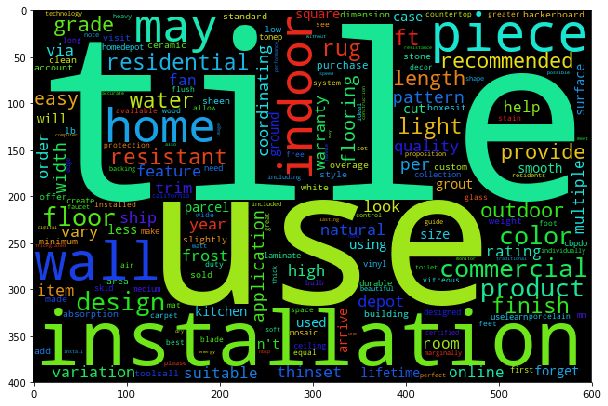

In [12]:
cos_res_wordcloud = WordCloud(width=600, height=400).generate(com_res_words)
plt.figure(figsize=(10,10))
plt.imshow(cos_res_wordcloud)

Words with bigger font size are the most repeated words with labels 'commercial/residential'.So there is a high probability,that if the text contains the following words,then it is telling something about residence/commercial
We can see this for different labels.

In [13]:
energy_cer_words=' '
for val in energy_cer['text']:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        energy_cer_words=energy_cer_words + words + ' '

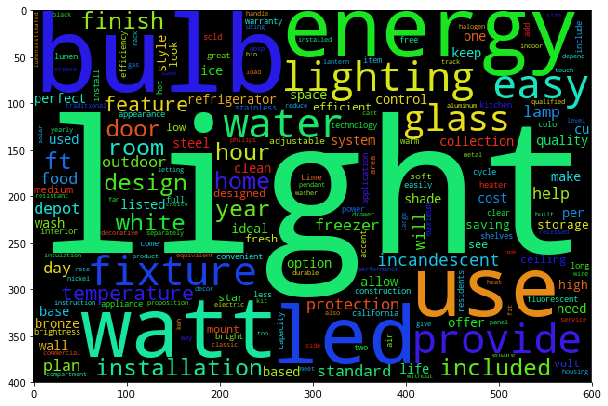

In [14]:
energy_cer_wordcloud = WordCloud(width=600, height=400).generate(energy_cer_words)
plt.figure(figsize=(10,10))
plt.imshow(energy_cer_wordcloud)

In [15]:
floor_type_words=' '
for val in floor_type['text']:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        floor_type_words=floor_type_words + words + ' '

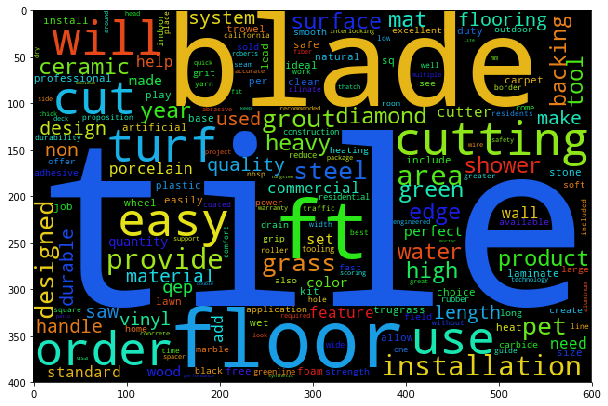

In [16]:
floor_type_wordcloud = WordCloud(width=600, height=400).generate(floor_type_words)
plt.figure(figsize=(10,10))
plt.imshow(floor_type_wordcloud)

Here we can obseve that 'tile'is the most repeated word in both floor type and commercial/residential.

In [17]:
watt_words=' '
for val in watt['text']:
    text=val.lower()
    tokens=nltk.word_tokenize(text)
    for words in tokens:
        watt_words=watt_words + words + ' '

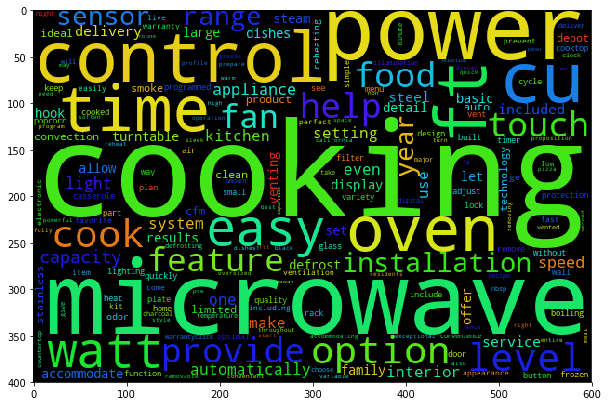

In [18]:
watt_wordcloud = WordCloud(width=600, height=400).generate(watt_words)
plt.figure(figsize=(10,10))
plt.imshow(watt_wordcloud)

We can do this for different labels.And get the most frequent word repeated with repected to labels.Now we'll go for predictions.Firstly we convert chatagorical variables to continuous variables

In [13]:
data['label']=pd.factorize(data['label'])[0]
data.head()

C:\Users\jenin joy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,text,id,label
0,"Keep your gloves, hats, coats and jackets toge...",122885,0
3,The Home Dynamix Serendipity Ivory 5 ft. 2 in....,188958,1
7,The Bosch 18-Volt lithium-ion line of Cordless...,146065,2
9,Restore your Porter-Cable sander or polisher t...,165138,2
10,The SPIKECUBE Surge Suppressor from Tripp Lite...,185565,1


In [14]:
x=data['text']
y=data['label']

## Now we'll clean the data using nltk packages and we'll append it to cleaned.

Firstly we'll bring all the text to small letter.Then we'll split all the words from sentence.Then we'll remove all the numbers and names. 

In [15]:
all_names=set(names.words())
lemmatizer=WordNetLemmatizer()
def letters_only(astr):                   #it will remove all the numbers and return only words 
    return astr.isalpha()

In [16]:
cleaned=[]
for post in data['text']:
    cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())
                                                for word in post.split()
                                                if letters_only(word) and word not in all_names]))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english',max_features=2000)
x2=cv.fit_transform(cleaned)
x2

<41569x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 1638404 stored elements in Compressed Sparse Row format>

We have used countvectorizer here to create a sparse matrix.ie it will see the number of times a word is repeated in different sentences and it locates the value.we can also use 'tfidf' which is more efficient.ie it gives higher priority for the meaningfull words which is repeated lesser times. 

##now we'll train the model

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.30,random_state=0)

In [19]:
def classifier(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    return accuracy  

In [20]:
classifier(LogisticRegression()),classifier(SVC()),classifier(MultinomialNB(alpha=1))

(0.8545425386897603, 0.7331408868575094, 0.7424424665223318)

So here we can see that LogisticRegression is giving more accuracy than SVM and Naive Bayes.so we'll take LogisticRegression for predicting test sample.We can also check for precision,recall,f1-stats.In real time we'll have to check for precision,recall and f1-stats because accuracy only gives the information of correctly predicted ,but not for false predictions.

In [21]:
#we'll take the test data
y_sample=pd.read_csv('test_data.csv')
y_sample.head()

,text,id
0,These machine screw nuts are designed to be us...,114689
1,The M18 FUEL Drill/Driver is the Most Powerful...,183172
2,Steel City 2-Gang 30 cu. in. Square Electrical...,217304
3,Native Collection Plus has Shaw's SilentStep P...,184115
4,Fasade decorative 4 ft. x 8 ft. vinyl wall pan...,103786


In [22]:
x_train=data['text']
y_train=data['label']
x_test=y_sample['text']

## we'll make a pipeline for getting more accurate results for new values.

In [23]:
pipe_lr=make_pipeline(CountVectorizer(stop_words='english',max_features=2000),
                     LogisticRegression(penalty='l2',C=1))

In [24]:
pipe_lr.fit(x_train,y_train)
y_pred=pipe_lr.predict(x_test)

In [25]:

y_pred

array([3, 2, 3, ..., 3, 6, 1], dtype=int64)

These are the predicted labels for test samples.

In [28]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('prediction.csv')